In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
foldernames_to_id={"VeryMildDemented":1, "NonDemented":0, "ModerateDemented":2, "MildDemented":3}
import os
import torch

In [4]:
from PIL import Image
from numpy import asarray
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,models
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os.path
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.1) # set validation split

In [6]:
foldername='/content/drive/My Drive/ml_project/Dataset/'
train_images = train_datagen.flow_from_directory(
    foldername,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_images = train_datagen.flow_from_directory(
    foldername , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 30586 images belonging to 4 classes.
Found 3398 images belonging to 4 classes.


In [7]:
def create_model():
  inception_model = Sequential()

  pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
  for layer in pretrained_model.layers:
        layer.trainable=False

  inception_model.add(pretrained_model)

  inception_model.add(Flatten())
  inception_model.add(Dense(512, activation='relu'))
  inception_model.add(Dropout(0.2))
  inception_model.add(Dense(4, activation='softmax'))
  inception_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
  return inception_model

In [8]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 22,853,924
Trainable params: 1,051,140
Non-trainable params: 21,802,784
_____________________________________

In [9]:
# Include the epoch in the file name (uses `str.format`)
checkpointdir='/content/drive/My Drive/ml_project/Checkpoints/'
checkpoint_path = checkpointdir+"Inception-training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=10*batch_size)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

In [10]:
# Evaluate the model
#loss, acc = model.evaluate(validation_images, verbose=2)
#print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [11]:
history = model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=200,
    callbacks=[cp_callback])

Epoch 1/200
319/956 [=========>....................] - ETA: 48:47 - loss: 1.0664 - accuracy: 0.5210
Epoch 1: saving model to /content/drive/My Drive/ml_project/Checkpoints/Inception-training/cp-0001.ckpt
639/956 [===================>..........] - ETA: 23:53 - loss: 0.9771 - accuracy: 0.5543
Epoch 1: saving model to /content/drive/My Drive/ml_project/Checkpoints/Inception-training/cp-0001.ckpt
956/956 [==============================] - 4750s 5s/step - loss: 0.9314 - accuracy: 0.5731 - val_loss: 0.8024 - val_accuracy: 0.6283
Epoch 2/200
  3/956 [..............................] - ETA: 1:09 - loss: 0.7795 - accuracy: 0.6354
Epoch 2: saving model to /content/drive/My Drive/ml_project/Checkpoints/Inception-training/cp-0002.ckpt
323/956 [=========>....................] - ETA: 48s - loss: 0.7978 - accuracy: 0.6335
Epoch 2: saving model to /content/drive/My Drive/ml_project/Checkpoints/Inception-training/cp-0002.ckpt
643/956 [===================>..........] - ETA: 24s - loss: 0.7822 - accuracy:

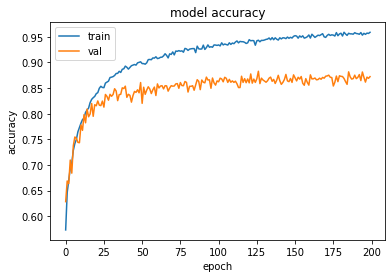

In [12]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

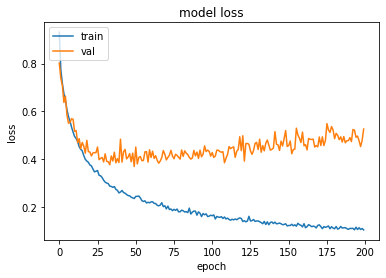

In [13]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

2 following cells are for loading latest trained models

In [14]:
# Create a basic model instance
#model = create_model()

# Evaluate the model
#loss, acc = model.evaluate(validation_images, verbose=2)
#print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

In [15]:
# Loads the weights
#p='/content/drive/My Drive/ml_project/Checkpoints/Inception-training/cp-"

#fill in the best model filename like 0004
#best_checkpoint_path=p+""+"".ckpt"
#latest = tf.train.latest_checkpoint(checkpoint_dir)
#model.load_weights(latest)

# Re-evaluate the model
#loss, acc = model.evaluate(validation_images, verbose=2)
#print("Restored model, accuracy: {:5.2f}%".format(100 * acc))